In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Salaries.csv")

In [ ]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
display(df.sample(5, random_state=42))

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
41518,41519,Robyn Gralicer,Firefighter,106975.43,14408.16,9951.03,36683.56,131334.62,168018.18,2012,NaN,San Francisco,NaN
113210,113211,Robert J Vernengo,Police Officer 3,123148.06,33225.19,4606.65,39856.27,160979.90,200836.17,2014,NaN,San Francisco,FT
54910,54911,Jessica Dabiri,Legal Assistant,68978.8,0.0,0.0,31388.55,68978.80,100367.35,2012,NaN,San Francisco,NaN
141415,141416,Daynin Gordon,Recreation Specialist,15201.55,0.00,0.00,7602.67,15201.55,22804.22,2014,NaN,San Francisco,PT
87195,87196,Valentine I Omokaro,Planner 2,87354.64,0.0,0.0,31029.15,87354.64,118383.79,2013,NaN,San Francisco,NaN


In [ ]:
print("Shape (rows, columns):", df.shape)
print("\n📌 معلومات عامة عن البيانات:")
df.info()

print("\n📌 أنواع الأعمدة (dtypes):")
print(df.dtypes)

Shape (rows, columns): (148654, 13)

📌 معلومات عامة عن البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB

📌 أنواع الأعمدة (dtypes):
Id            

In [ ]:
df['Id'] = df['Id'].astype(str)

pay_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in pay_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("✅ تم تعديل أنواع البيانات.")
display(df.head())

✅ تم تعديل أنواع البيانات.


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
non_null_counts = df.count()
missing_counts = df.isna().sum()
missing_percent = df.isna().mean() * 100
unique_counts = df.nunique()

summary = pd.DataFrame({
    "dtype": df.dtypes,
    "non_null_count": non_null_counts,
    "missing_count": missing_counts,
    "missing_percent": missing_percent.round(2),
    "unique_count": unique_counts
})

display(summary.sort_values("missing_percent", ascending=False))

,dtype,non_null_count,missing_count,missing_percent,unique_count
Notes,float64,0,148654,100.00,0
Status,object,38119,110535,74.36,2
Benefits,float64,112491,36163,24.33,98465
BasePay,float64,148045,609,0.41,109489
Id,object,148654,0,0.00,148654
OvertimePay,float64,148650,4,0.00,65998
JobTitle,object,148654,0,0.00,2159
EmployeeName,object,148654,0,0.00,110811
OtherPay,float64,148650,4,0.00,83225
TotalPayBenefits,float64,148654,0,0.00,142098


In [ ]:
print("Numeric Summary:")
display(df.describe().T)

Numeric Summary:


,count,mean,std,min,25%,50%,75%,max
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_df = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_percent": (df.isna().mean()*100).round(2),
    "dtype": df.dtypes
})
missing_df = missing_df.sort_values("missing_percent", ascending=False)
display(missing_df)

,missing_count,missing_percent,dtype
Notes,148654,100.00,float64
Status,110535,74.36,object
Benefits,36163,24.33,float64
BasePay,609,0.41,float64
Id,0,0.00,object
OvertimePay,4,0.00,float64
JobTitle,0,0.00,object
EmployeeName,0,0.00,object
OtherPay,4,0.00,float64
TotalPayBenefits,0,0.00,float64


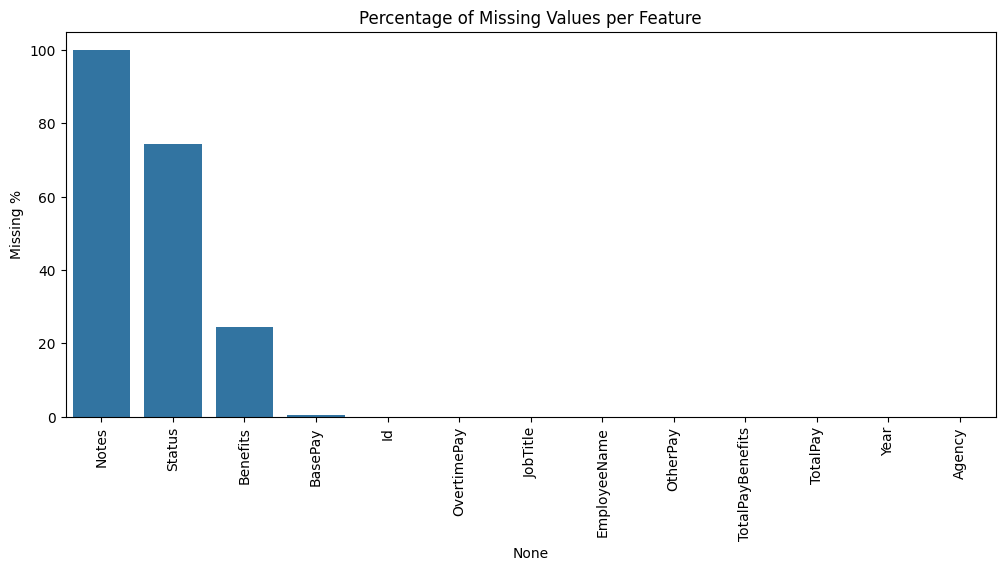

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=missing_df.index, y=missing_df["missing_percent"])
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Feature")
plt.ylabel("Missing %")
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

print("🔢 Numerical columns:", num_cols)
print("🔠 Categorical columns:", cat_cols)

🔢 Numerical columns: ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes']
🔠 Categorical columns: ['Id', 'EmployeeName', 'JobTitle', 'Agency', 'Status']


In [ ]:
for col in cat_cols:
    print(f"\n📌 Column: {col}")
    print(df[col].value_counts(dropna=False).head(15))


📌 Column: Id
Id
148654    1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
148638    1
Name: count, dtype: int64

📌 Column: EmployeeName
EmployeeName
Kevin Lee            13
William Wong         11
Richard Lee          11
Steven Lee           11
John Chan             9
Michael Wong          9
KEVIN LEE             9
Stanley Lee           9
William Lee           8
MICHAEL LEE           8
DAVID WONG            8
David Wong            8
Victor Lee            8
RICHARD LEE           8
Michael A Johnson     7
Name: count, dtype: int64

📌 Column: JobTitle
JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader            

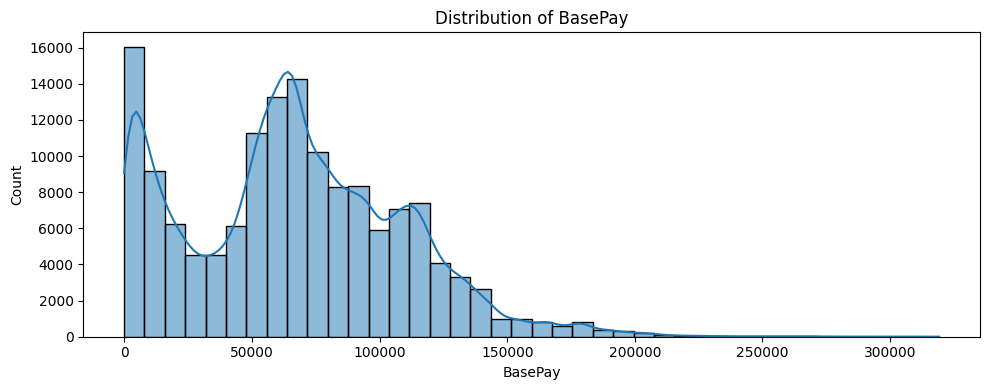

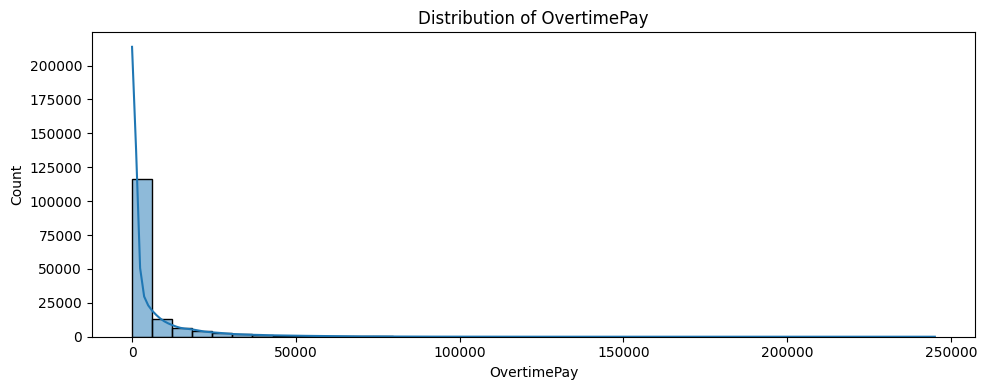

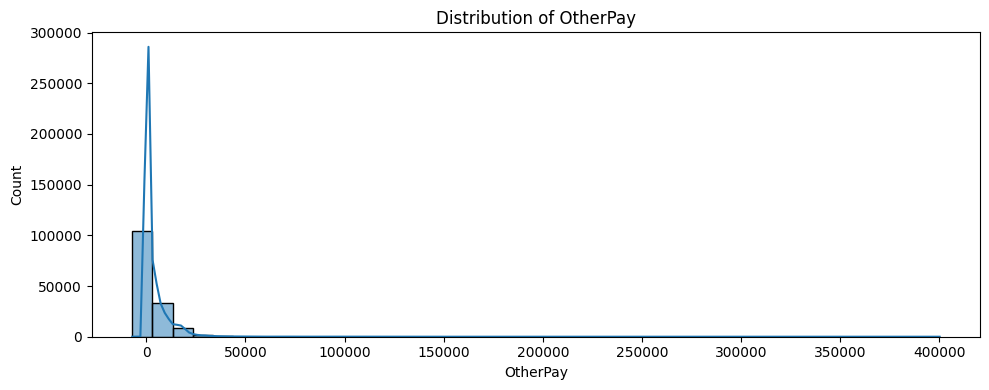

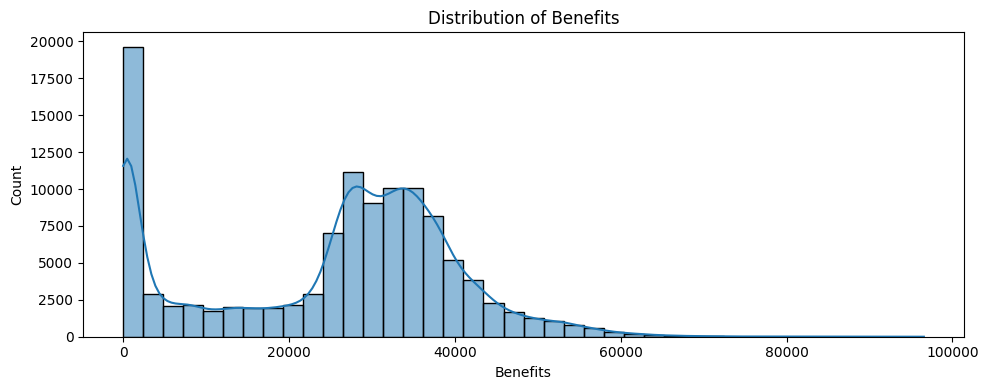

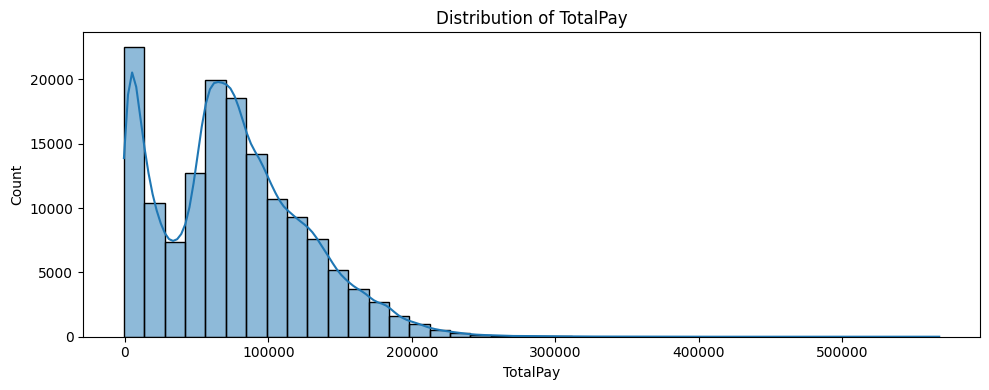

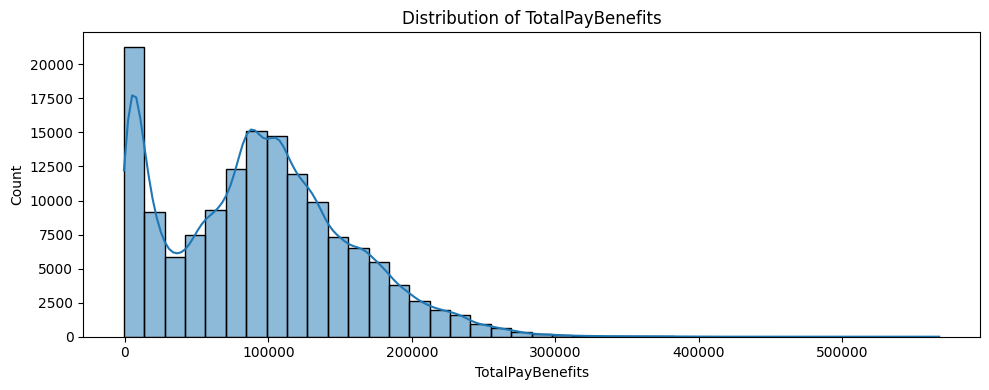

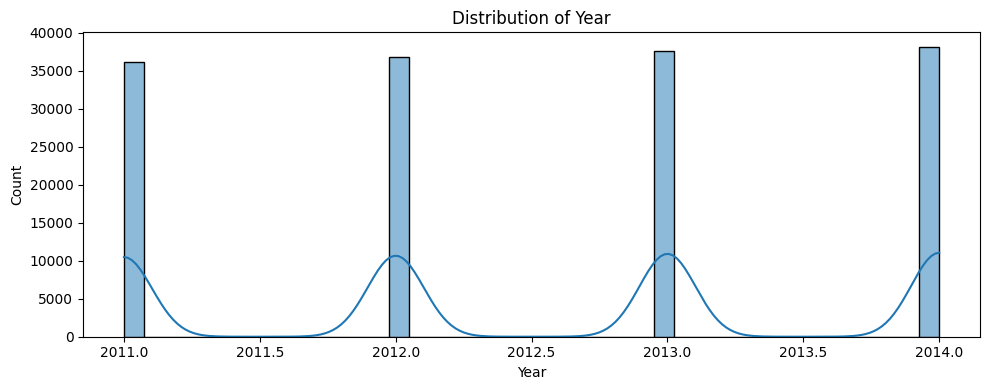

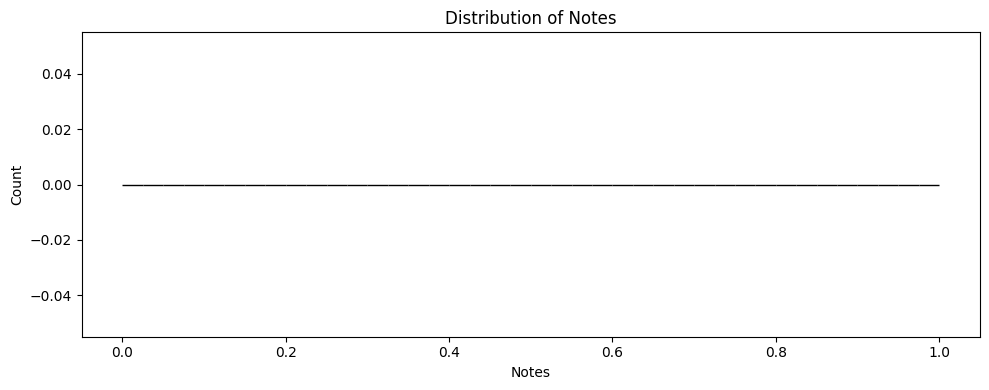

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

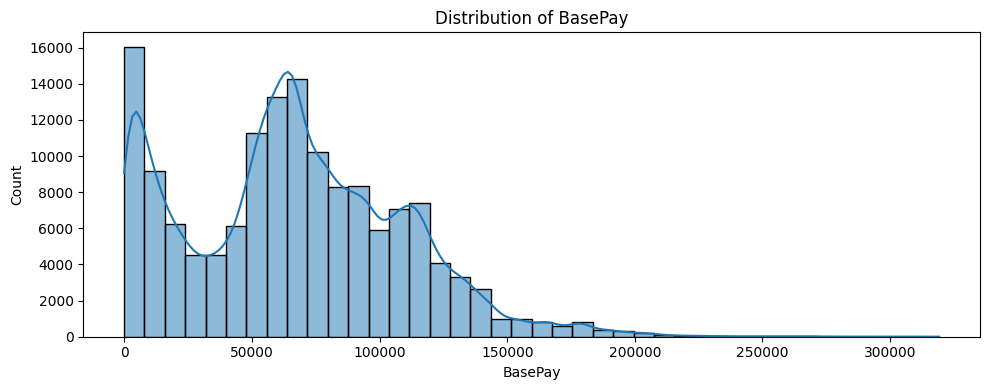

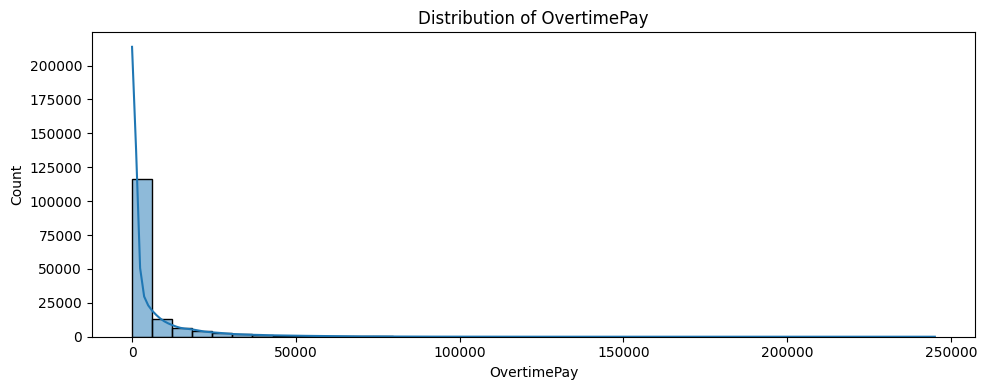

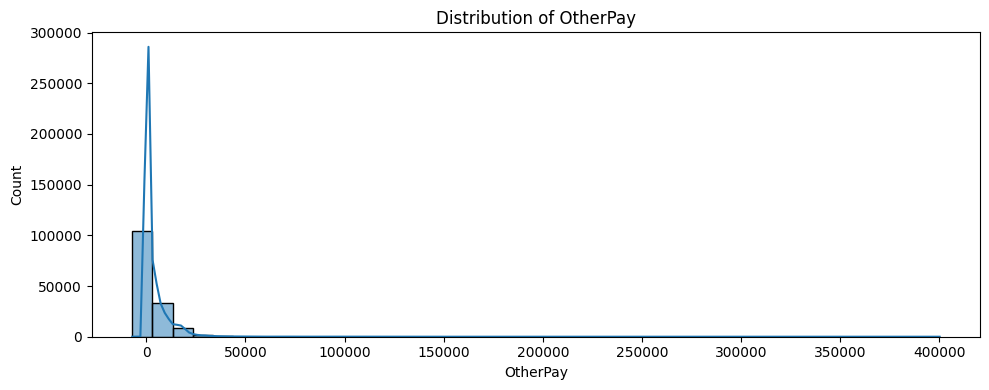

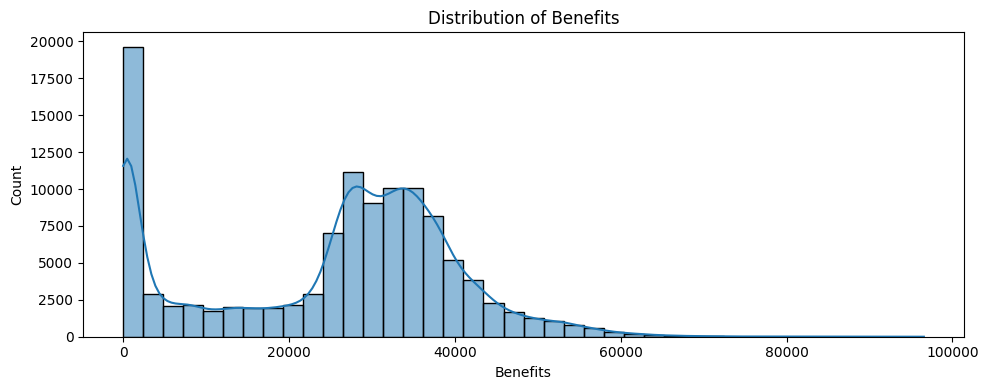

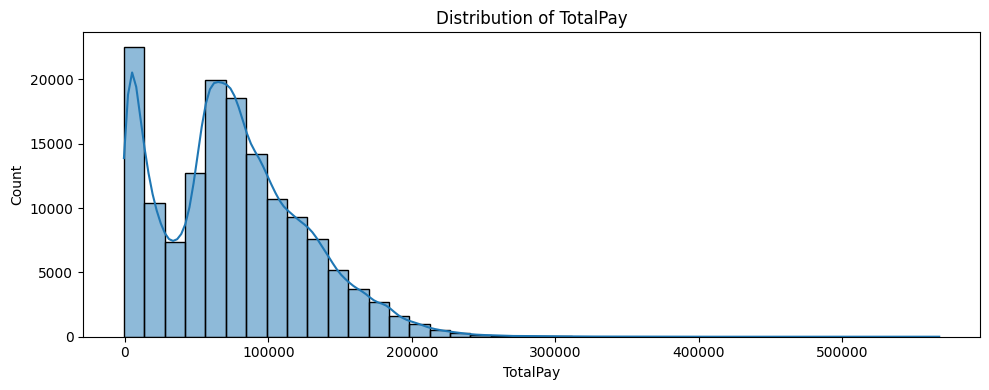

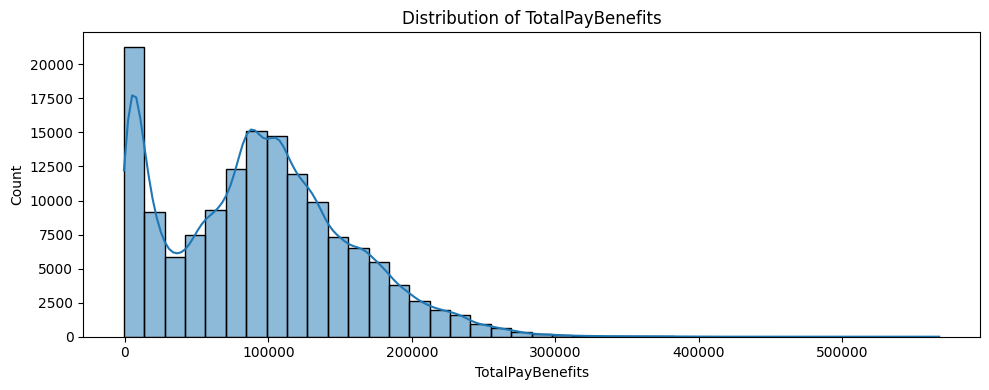

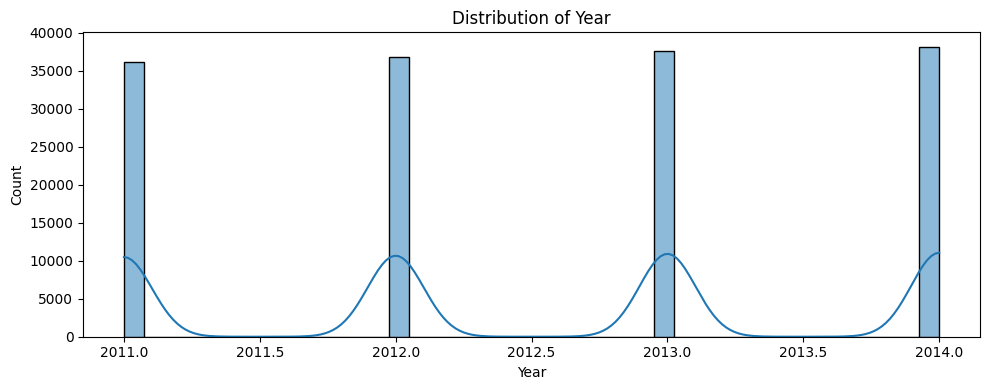

In [ ]:
for col in num_cols:

    if df[col].count() == 0:
        continue

    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
skewness = df[num_cols].skew().sort_values(ascending=False)
print("📌 Skewness لكل عمود عددي:")
print(skewness)

📌 Skewness لكل عمود عددي:
OtherPay            8.990847
OvertimePay         4.100796
TotalPay            0.569503
TotalPayBenefits    0.448701
BasePay             0.423350
Year               -0.028339
Benefits           -0.298600
Notes                    NaN
dtype: float64


In [ ]:
df_prep = df.copy()

cols_to_drop = ['Id', 'EmployeeName', 'Notes', 'Agency', 'Status']
df_prep = df_prep.drop(columns=[c for c in cols_to_drop if c in df_prep.columns])

print("Shape after dropping some columns:", df_prep.shape)
display(df_prep.head())

Shape after dropping some columns: (148654, 8)


,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


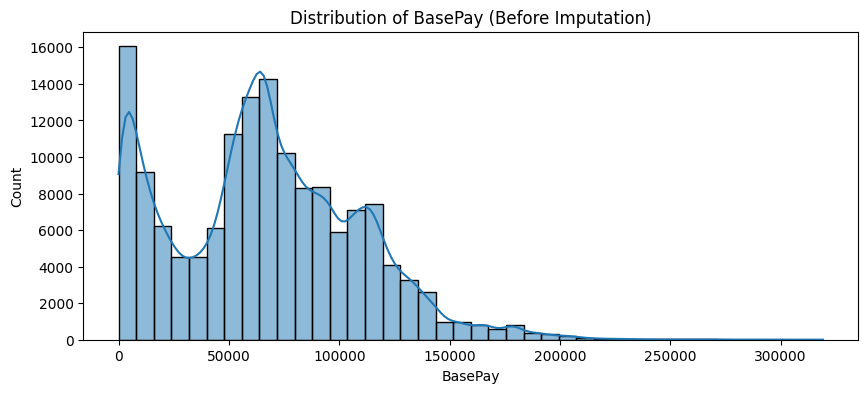

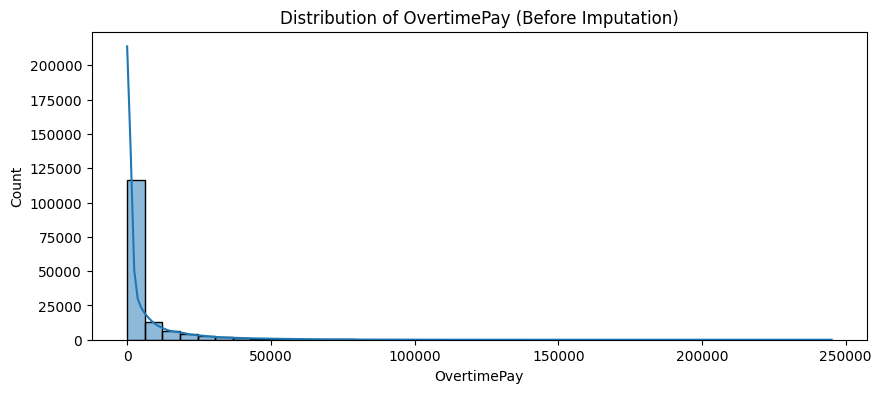

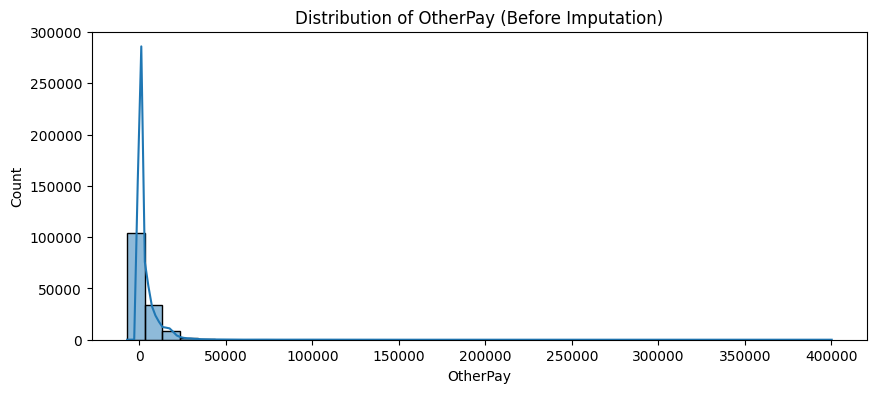

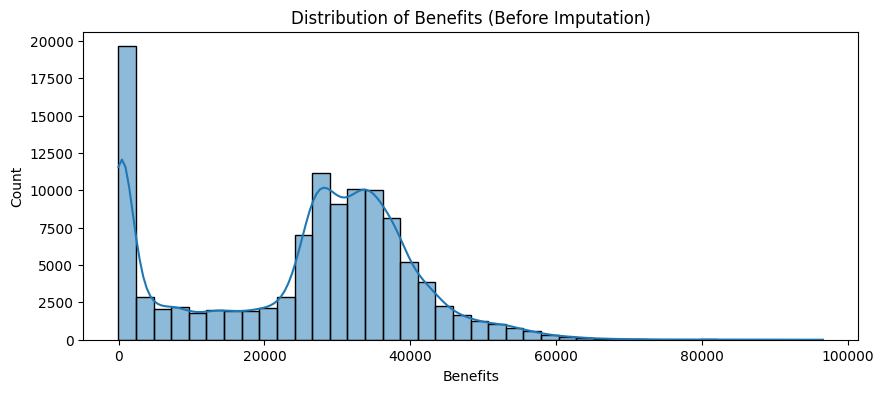

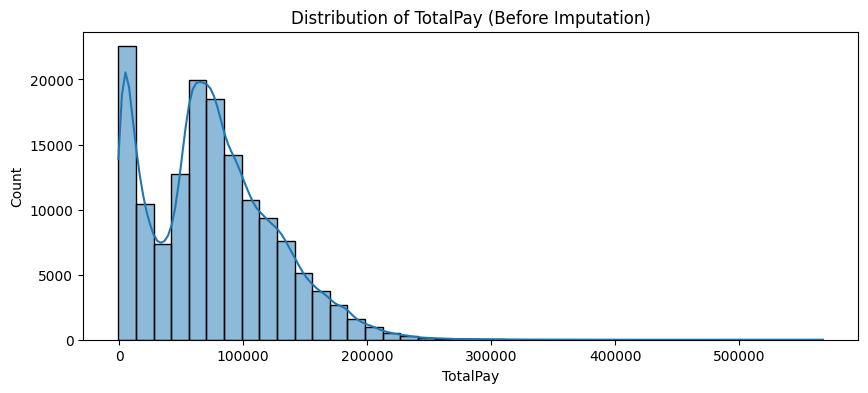

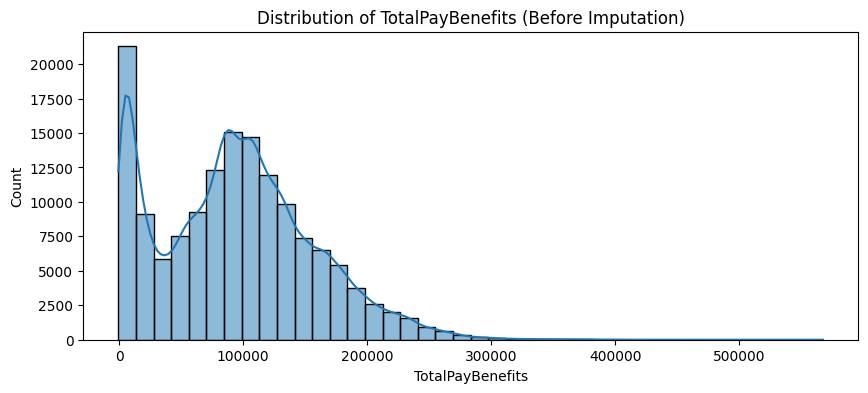

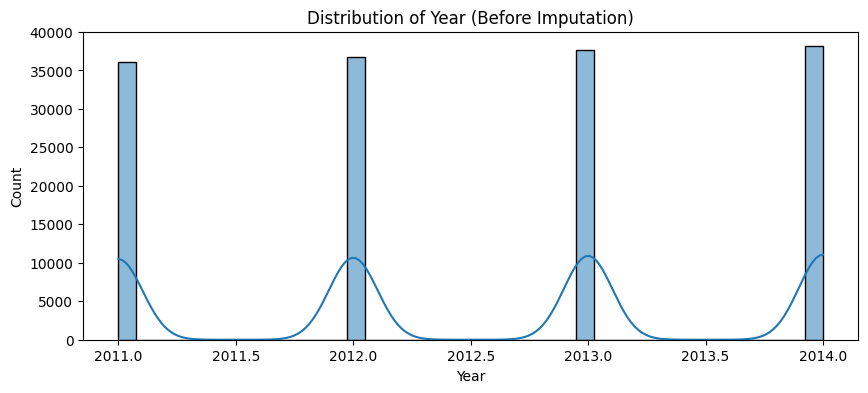

In [ ]:
num_cols_prep = df_prep.select_dtypes(include=np.number).columns.tolist()

for col in num_cols_prep:
    plt.figure(figsize=(10,4))
    sns.histplot(df_prep[col], bins=40, kde=True)
    plt.title(f"Distribution of {col} (Before Imputation)")
    plt.show()

In [ ]:
skewness_prep = df_prep[num_cols_prep].skew().sort_values(ascending=False)
print("📌 Skewness بعد التجهيز:")
print(skewness_prep)

📌 Skewness بعد التجهيز:
OtherPay            8.990847
OvertimePay         4.100796
TotalPay            0.569503
TotalPayBenefits    0.448701
BasePay             0.423350
Year               -0.028339
Benefits           -0.298600
dtype: float64


In [ ]:
df_imp = df_prep.copy()

mean_cols = []
median_cols = []

for col in num_cols_prep:
    skew_val = df_prep[col].skew()
    if abs(skew_val) < 0.5:
        mean_cols.append(col)
    else:
        median_cols.append(col)

print(" Columns to impute with MEAN:", mean_cols)
print(" Columns to impute with MEDIAN:", median_cols)

 Columns to impute with MEAN: ['BasePay', 'Benefits', 'TotalPayBenefits', 'Year']
 Columns to impute with MEDIAN: ['OvertimePay', 'OtherPay', 'TotalPay']


In [ ]:
for col in mean_cols:
    df_imp[col] = df_imp[col].fillna(df_imp[col].mean())

for col in median_cols:
    df_imp[col] = df_imp[col].fillna(df_imp[col].median())

In [ ]:
print("✅ عدد القيم المفقودة بعد التعويض:")
print(df_imp.isna().sum())

✅ عدد القيم المفقودة بعد التعويض:
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


In [ ]:
df_out = df_imp.copy()
num_cols_out = df_out.select_dtypes(include=np.number).columns.tolist()

Q1 = df_out[num_cols_out].quantile(0.25)
Q3 = df_out[num_cols_out].quantile(0.75)
IQR = Q3 - Q1


condition_iqr = ~(
    (df_out[num_cols_out] < (Q1 - 1.5*IQR)) |
    (df_out[num_cols_out] > (Q3 + 1.5*IQR))
).any(axis=1)

df_iqr_clean = df_out[condition_iqr]
print("Shape after IQR outlier removal:", df_iqr_clean.shape)

Shape after IQR outlier removal: (94201, 8)


In [ ]:
df_clean = df_iqr_clean.copy()

In [ ]:
print("Number of duplicate rows:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()
print("Shape after dropping duplicates:", df_clean.shape)

Number of duplicate rows: 3960
Shape after dropping duplicates: (90241, 8)


In [ ]:
print("✅ Final DataFrame info:")
df_clean.info()
print("📊 Summary statistics (Numerical):")
display(df_clean.describe().T)

✅ Final DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 90241 entries, 315 to 148646
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobTitle          90241 non-null  object 
 1   BasePay           90241 non-null  float64
 2   OvertimePay       90241 non-null  float64
 3   OtherPay          90241 non-null  float64
 4   Benefits          90241 non-null  float64
 5   TotalPay          90241 non-null  float64
 6   TotalPayBenefits  90241 non-null  float64
 7   Year              90241 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.2+ MB
📊 Summary statistics (Numerical):


,count,mean,std,min,25%,50%,75%,max
BasePay,90241.0,67633.410760,33583.326026,0.00,48119.410000,65195.98,88544.41,185724.50
OvertimePay,90241.0,1667.221791,2779.261150,-0.01,0.000000,0.00,2397.27,11643.20
OtherPay,90241.0,1775.572390,2426.522942,-46.76,0.000000,648.07,2482.39,10589.40
Benefits,90241.0,27584.130104,7840.801285,5652.67,25007.893151,25706.10,32174.84,50154.69
TotalPay,90241.0,70921.114894,34895.905486,0.00,50731.000000,68985.06,92500.41,196236.41
TotalPayBenefits,90241.0,90848.048207,44717.115348,0.00,61038.790000,90854.43,118681.41,243533.40
Year,90241.0,2012.378608,1.140780,2011.00,2011.000000,2012.00,2013.00,2014.00


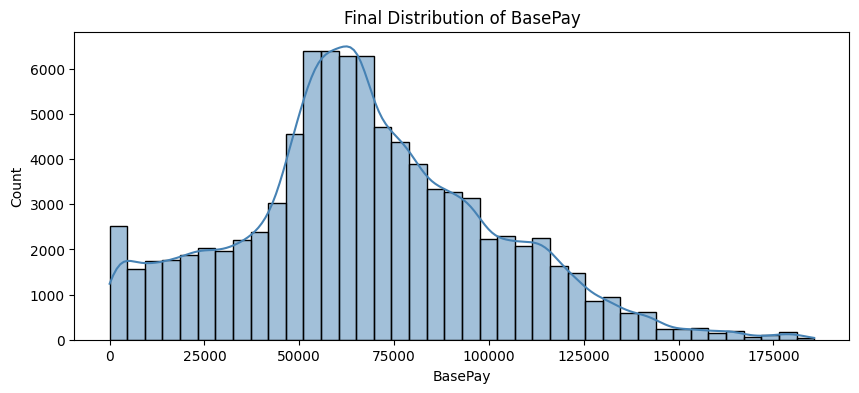

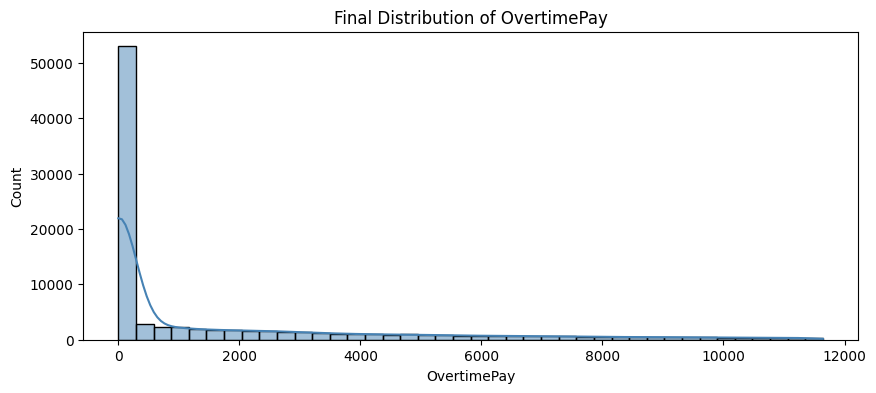

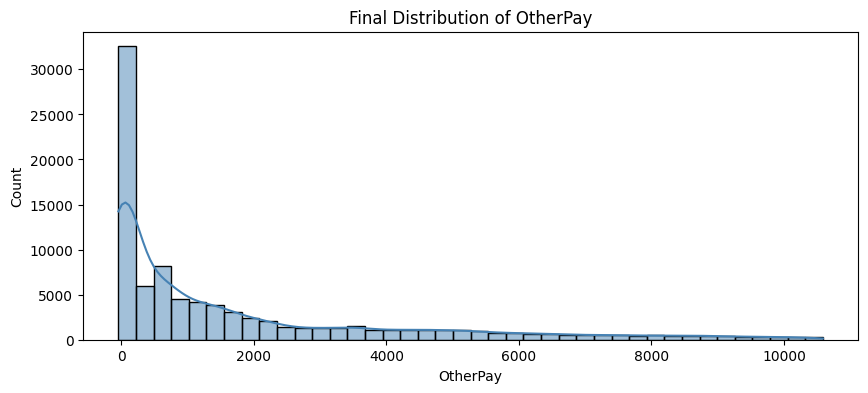

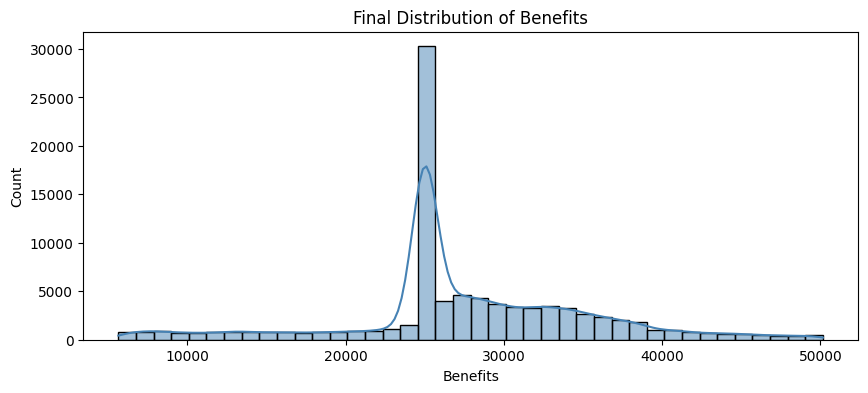

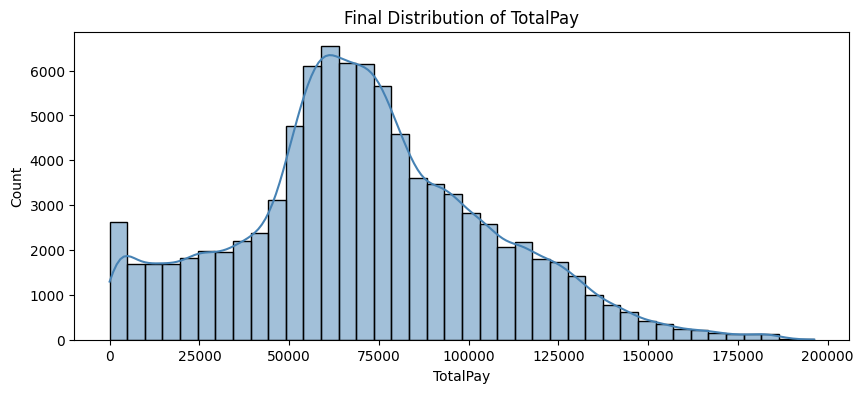

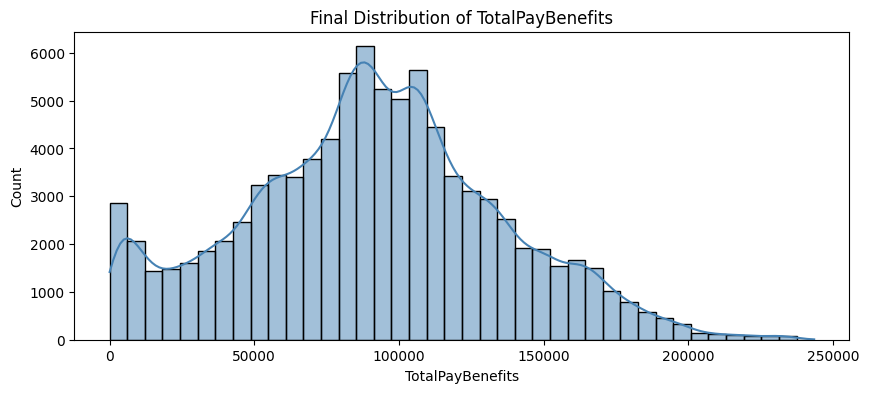

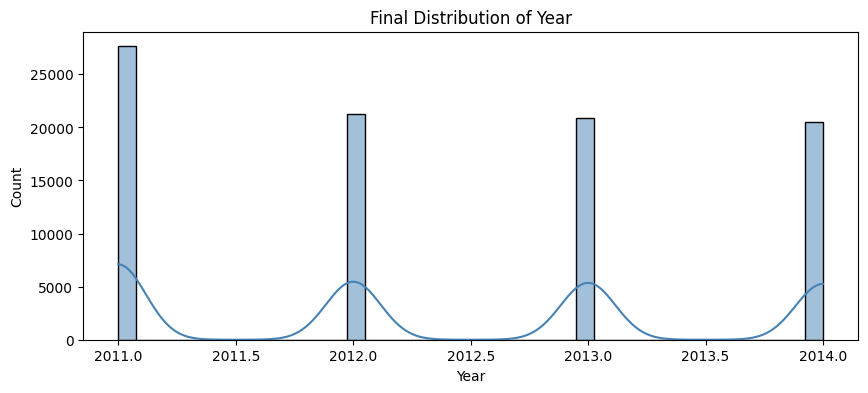

In [ ]:
num_cols_clean = df_clean.select_dtypes(include=np.number).columns
for col in num_cols_clean:
    plt.figure(figsize=(10,4))
    sns.histplot(df_clean[col], kde=True, bins=40, color="steelblue")
    plt.title(f"Final Distribution of {col}")
    plt.show()

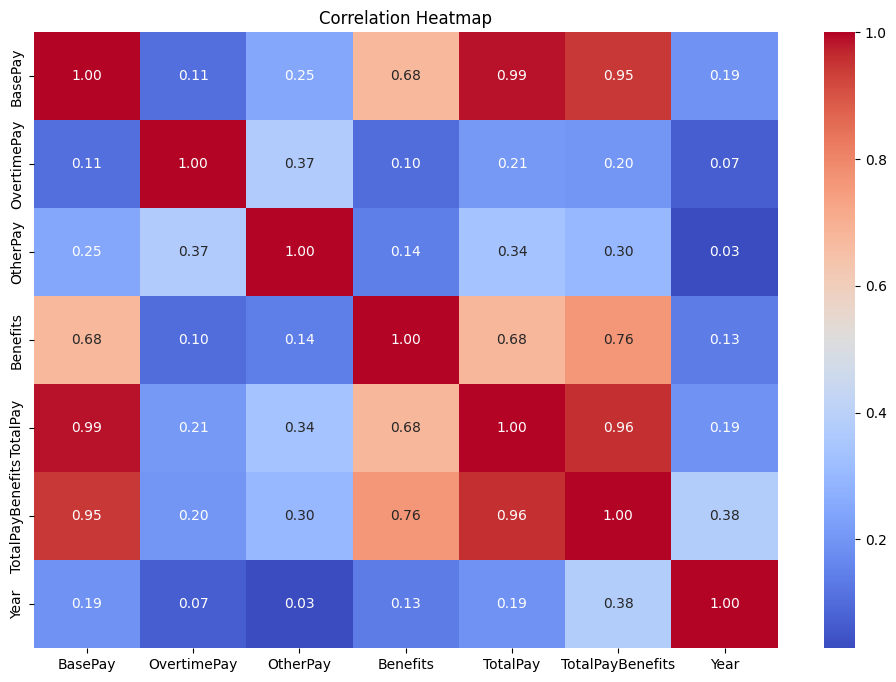

In [ ]:
plt.figure(figsize=(12,8))
corr = df_clean[num_cols_clean].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

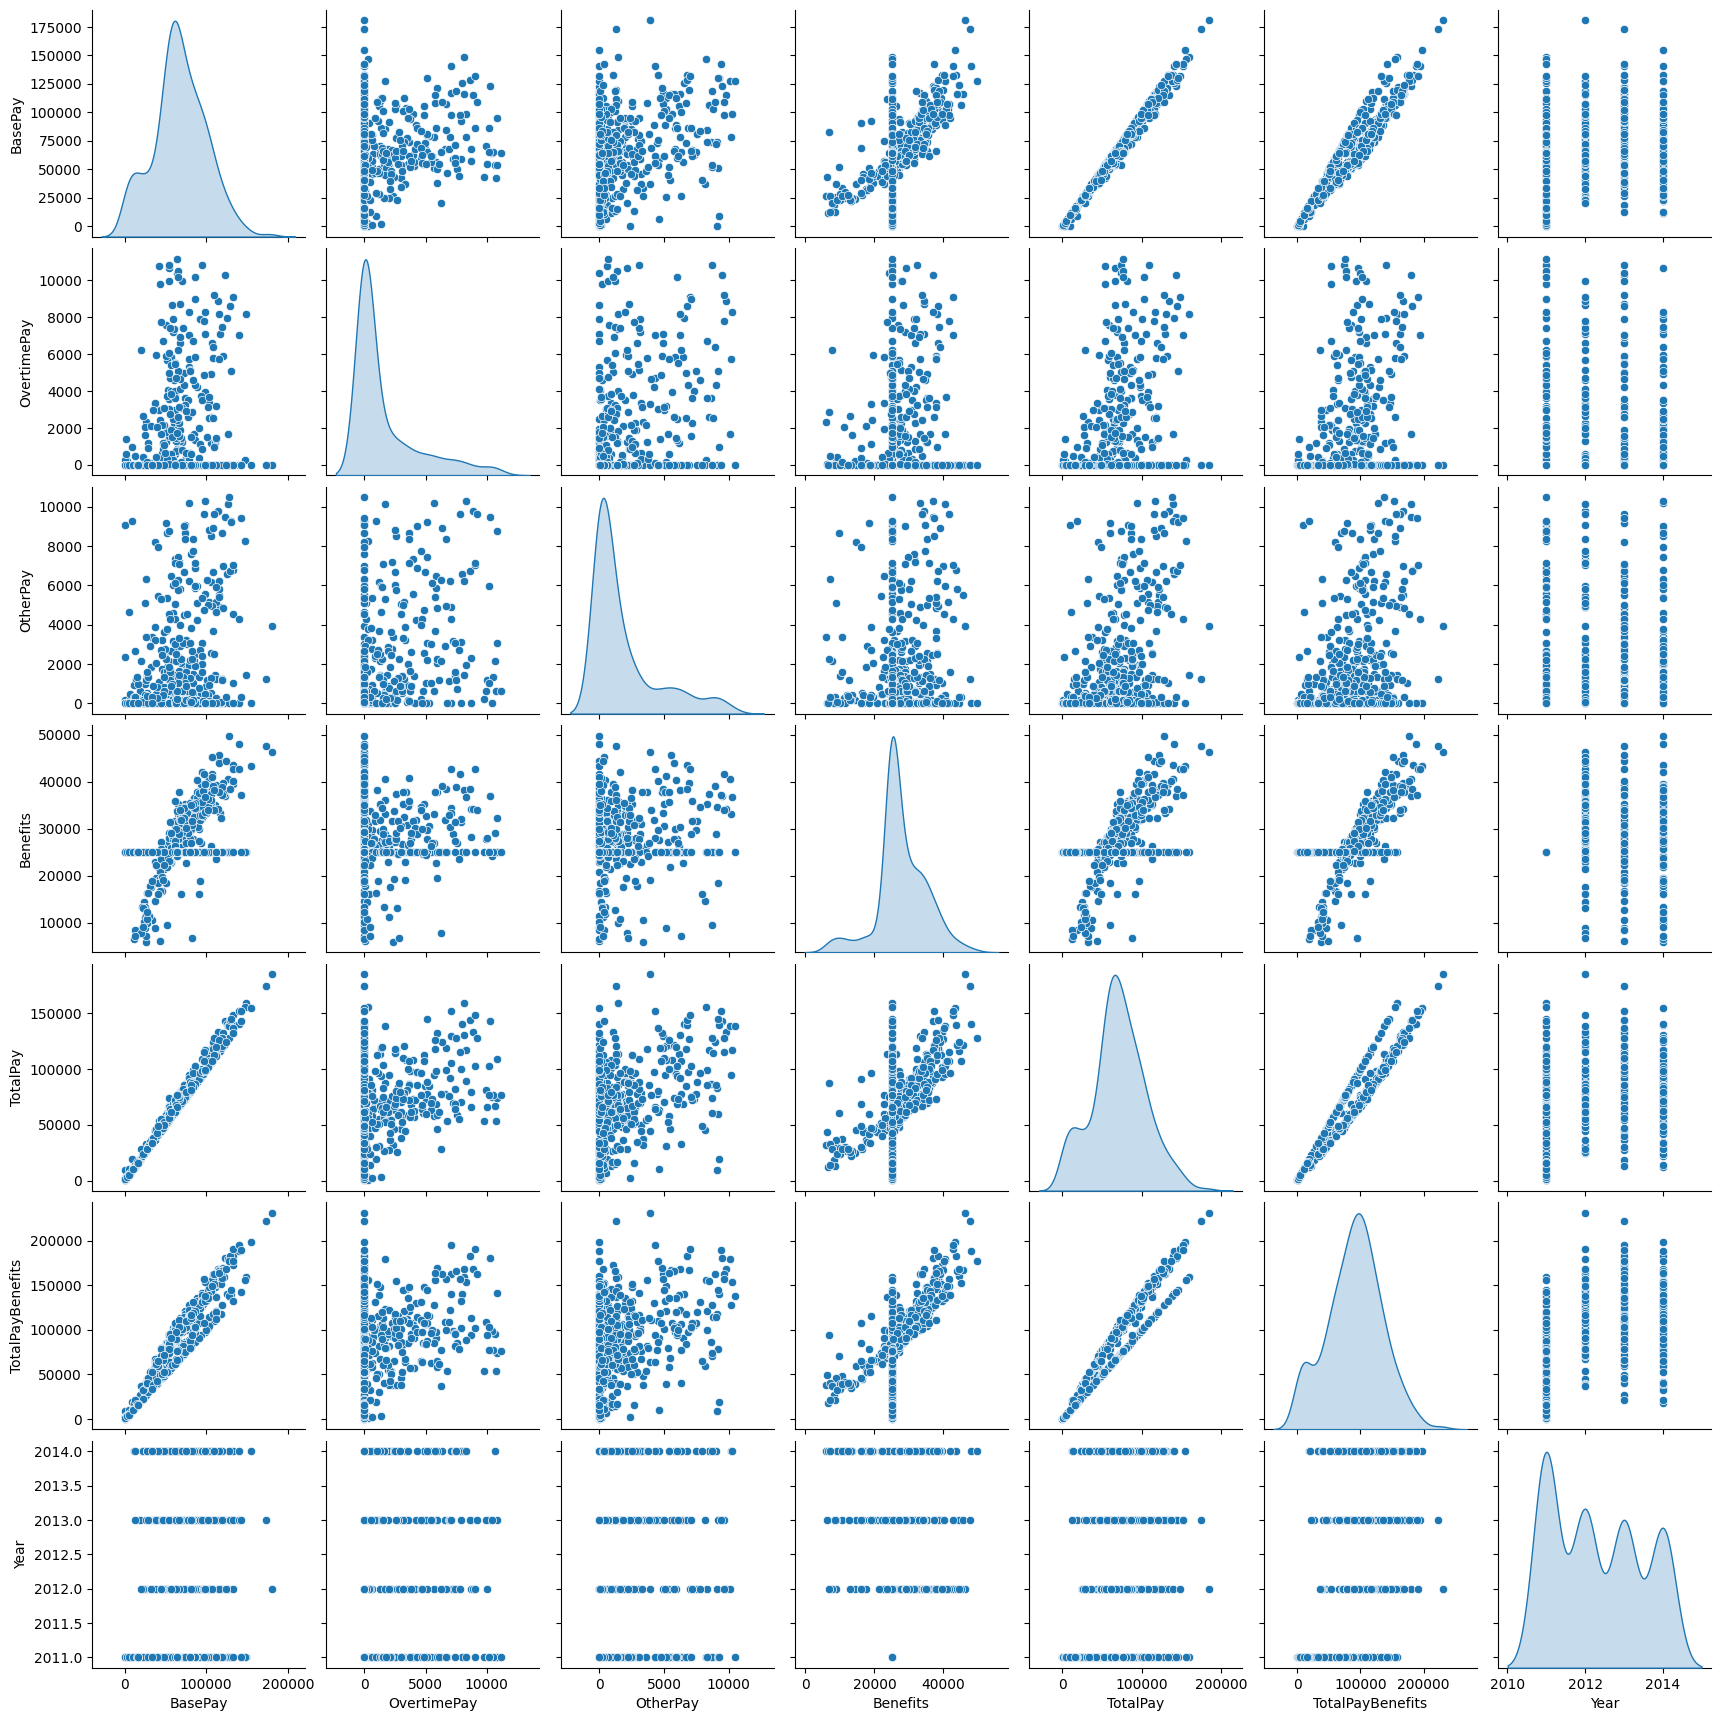

In [ ]:
sns.pairplot(df_clean.sample(min(500, len(df_clean))), diag_kind="kde")
plt.show()